In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("../Dataset/heart.csv")

In [87]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [89]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [90]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


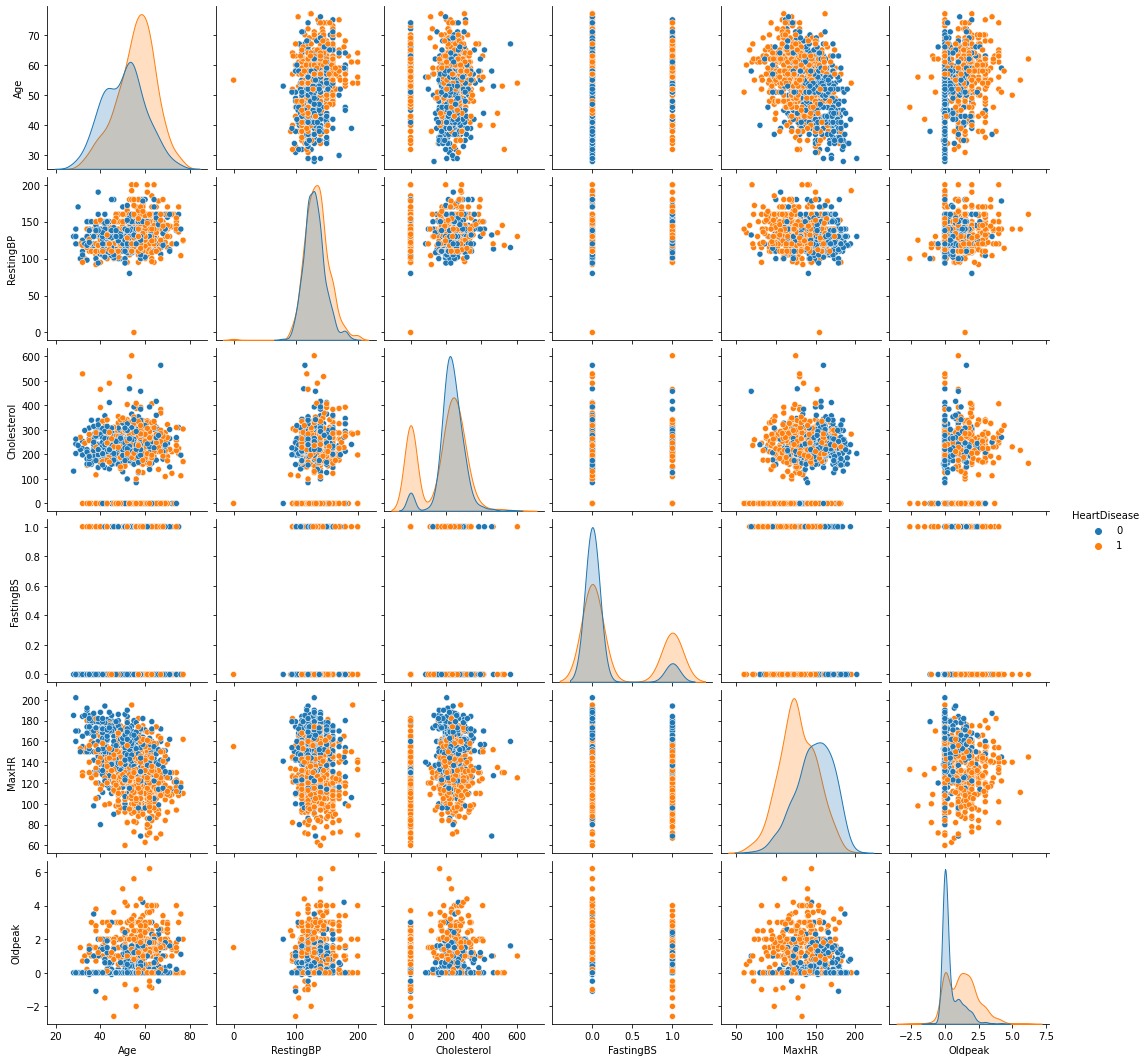

In [91]:
sns.pairplot(df,hue='HeartDisease')

In [92]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [93]:
df["Sex"]=df["Sex"].map({'M':1,'F':0})

<AxesSubplot:xlabel='Sex', ylabel='count'>

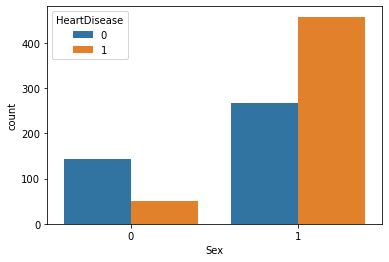

In [94]:
sns.countplot(x='Sex',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='Age', ylabel='MaxHR'>

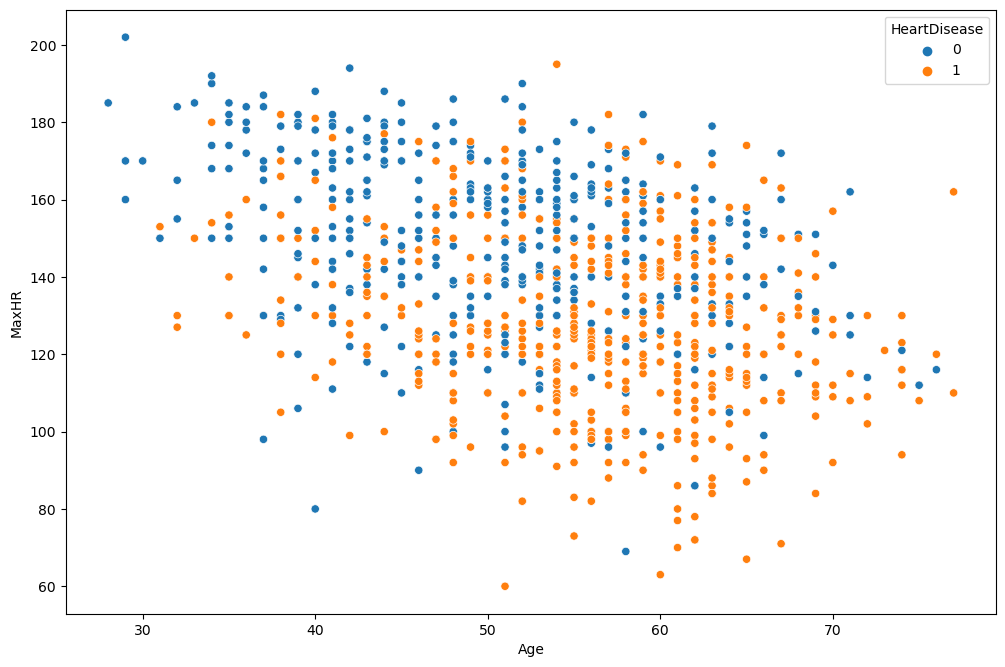

In [95]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='Age',y='MaxHR',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

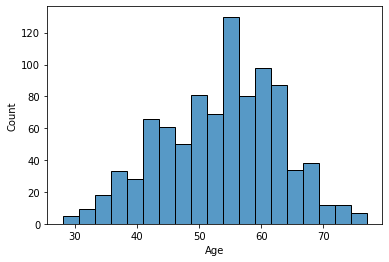

In [96]:
sns.histplot(df,x='Age')

In [97]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [98]:
df["ChestPainType"]=df["ChestPainType"].map({'ATA':0,'NAP':1,'ASY':2,'TA':3})

In [99]:
df["ChestPainType"].value_counts()

2    496
1    203
0    173
3     46
Name: ChestPainType, dtype: int64

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

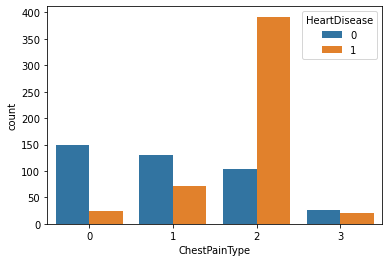

In [100]:
sns.countplot(x='ChestPainType',hue='HeartDisease',data=df)

<AxesSubplot:>

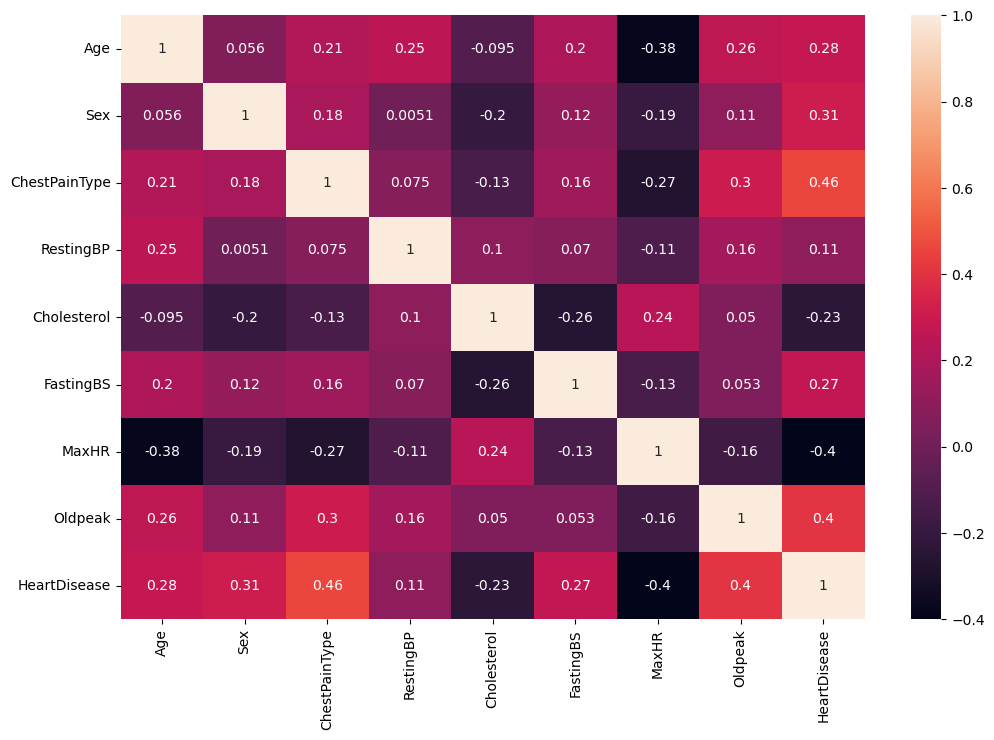

In [101]:
plt.figure(figsize=(12,8),dpi=100)
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='RestingBP'>

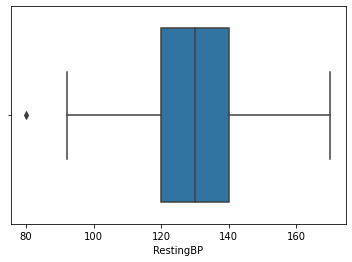

In [106]:
sns.boxplot(x='RestingBP',data=df)

In [107]:
df.loc[df['RestingBP'] < 80, 'RestingBP'] = df['RestingBP'].mean()

In [108]:
df.loc[df['RestingBP'] > 170, 'RestingBP'] = df['RestingBP'].mean()

<AxesSubplot:xlabel='Cholesterol'>

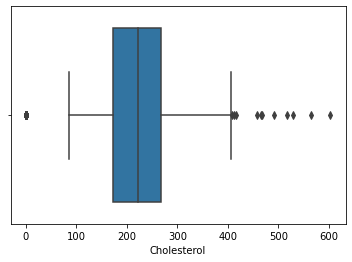

In [109]:
sns.boxplot(x='Cholesterol',data=df)

In [110]:
len(df[df['Cholesterol']==0])

172

In [111]:
df["Cholesterol"]=df["Cholesterol"].replace(0,df["Cholesterol"].mean())

In [112]:
len(df[df['Cholesterol']>400])

13

In [113]:
df.loc[df['Cholesterol'] > 400, 'Cholesterol'] = df['Cholesterol'].mean()

<AxesSubplot:xlabel='Cholesterol'>

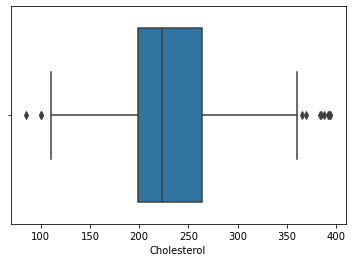

In [114]:
sns.boxplot(x='Cholesterol',data=df)

In [115]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [116]:
len(df[df['FastingBS']==0])

704

In [124]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,0,1,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,1,0,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,0,2,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,1,1,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [125]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [126]:
df["RestingECG"]=df["RestingECG"].map({'Normal':0,'ST':1,'LVH':2})

In [127]:
df["ExerciseAngina"]=df["ExerciseAngina"].map({'N':0,'Y':1})

In [128]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [129]:
df["ST_Slope"]=df["ST_Slope"].map({'Up':0,'Flat':1,'Down':2})

In [130]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.000000,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.000000,1.0,1.0,1.0
ChestPainType,918.0,1.452070,0.851832,0.0,1.000000,2.0,2.0,3.0
RestingBP,918.0,131.099625,15.688995,80.0,120.000000,130.0,140.0,170.0
Cholesterol,918.0,232.695143,47.976248,85.0,198.799564,223.0,264.0,394.0
FastingBS,918.0,0.233115,0.423046,0.0,0.000000,0.0,0.0,1.0
RestingECG,918.0,0.603486,0.805968,0.0,0.000000,0.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.000000,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.000000,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.000000,0.6,1.5,6.2


In [132]:
from sklearn.model_selection import train_test_split

In [134]:
X=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [161]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dt = DecisionTreeClassifier()

In [164]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [165]:
dtpreds = dt.predict(X_test)

In [166]:
from sklearn.metrics import classification_report,confusion_matrix

In [167]:
print(classification_report(dtpreds,y_test))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        87
           1       0.79      0.87      0.82        97

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



In [168]:
confusion_matrix(dtpreds,y_test)

array([[64, 23],
       [13, 84]], dtype=int64)

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
rfc = RandomForestClassifier()

In [173]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [174]:
rfPreds = rfc.predict(X_test)

In [175]:
print(classification_report(y_test,rfPreds))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [176]:
confusion_matrix(y_test,rfPreds)

array([[67, 10],
       [15, 92]], dtype=int64)

In [177]:
from sklearn.metrics import plot_confusion_matrix

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


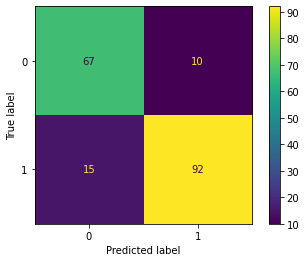

In [180]:
plot_confusion_matrix(rfc,X_test,y_test)

In [182]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [193]:
param_grid = {'n_estimators':[1,10,20,50,100,150,200,500,1000,5000],'bootstrap':[True,False],'oob_score':[True,False]}

In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
grid = GridSearchCV(rfc,param_grid,cv=5)

In [196]:
grid.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB esti

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [1, 10, 20, 50, 100, 150, 200, 500,
                                          1000, 5000],
                         'oob_score': [True, False]})

In [198]:
grid.best_params_

{'bootstrap': True, 'n_estimators': 50, 'oob_score': True}

In [199]:
from sklearn.metrics import accuracy_score

In [201]:
accuracy = []
estimate = []
for i in range(1,1000,10):
    rfc= RandomForestClassifier(n_estimators=i,bootstrap=True)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    ac = accuracy_score(y_test,preds)
    accuracy.append(ac)
    estimate.append(i)

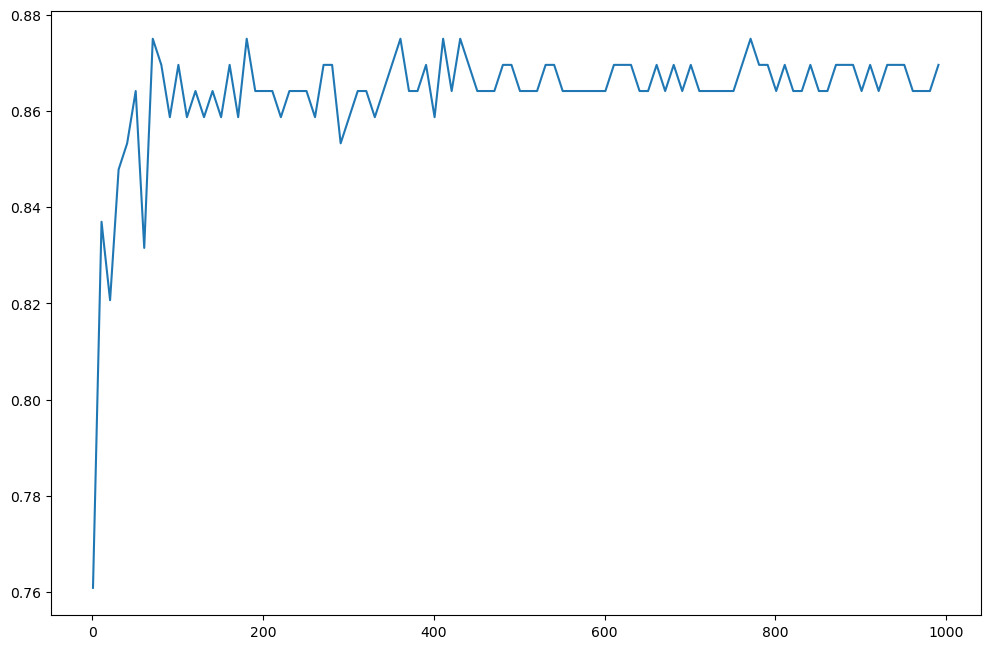

In [206]:
plt.figure(figsize=(12,8),dpi=100)
plt.plot(estimate,accuracy)

In [214]:
Heart_modal = RandomForestClassifier(n_estimators=50,bootstrap=True)

In [215]:
Heart_modal.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [216]:
preds=Heart_modal.predict(X_test)

In [217]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        84
           1       0.84      0.90      0.87       100

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


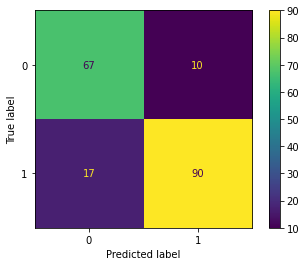

In [219]:
plot_confusion_matrix(Heart_modal,X_test,y_test)

In [220]:
accuracy_score(y_test,preds)

0.8532608695652174

In [221]:
import pickle

In [222]:
pickle.dump(Heart_modal,open("heart_modal.pkl",'wb'))

In [223]:
X.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [224]:
pickle.dump(list(X.columns),open('column_names_heart.pkl','wb'))

In [225]:
col_names = pickle.load(open('column_names_heart.pkl','rb'))

In [226]:
col_names

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

In [227]:
loaded_model = pickle.load(open('heart_modal.pkl','rb'))

In [228]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
348,69,1,2,137.0,198.799564,0,1,104,1,1.6,1,1
303,62,0,2,120.0,198.799564,1,1,123,1,1.7,2,1
521,61,1,2,120.0,282.000000,0,1,135,1,4.0,2,1
483,58,1,2,120.0,198.799564,0,2,106,1,1.5,2,1
35,32,1,0,125.0,254.000000,0,0,155,0,0.0,0,0


In [ ]:
loaded_model.predict([[1,2,137,198]])